In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from sklearn import svm

In [69]:
def plot_svm(svm, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z =svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z =Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plotData(X, y, 20)
    # plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svm.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='y', marker='|', s=20)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svm.support_.size)

    
def plotData(x, y, plotingSize):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.scatter(x[pos, 0], x[pos,1], s = plotingSize, c= 'b' ,marker='+')
    plt.scatter(x[neg, 0], x[neg,1], s = plotingSize, c='r',marker='o')



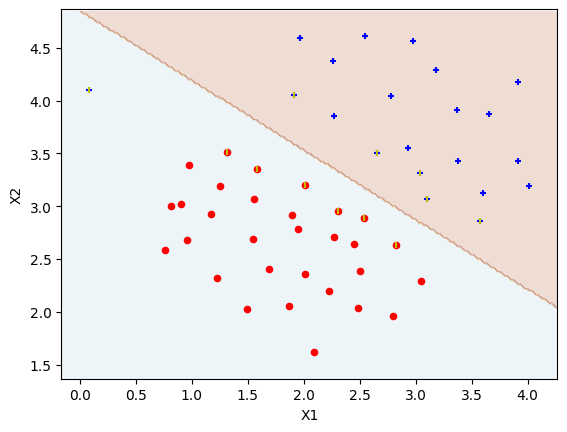

Number of support vectors:  12
[1]
Test accuracy = 98.04%


In [74]:
data = loadmat("D:\\most_wonted\\ai_projects\\svm\\data_set\\data1.mat")
# print(data1)

x = data['X']
y = data['y']
# print(x.shape,y.shape)


#small C  => UF
model = svm.SVC(C= 1.0, kernel='linear').fit(x, y.ravel())
plot_svm(model, x, y)

# #big C  => OF
# model = svm.SVC(C= 30, kernel='linear').fit(x, y.ravel())
# plot_svm(model, x, y)

testPoint = np.array([4,4]).reshape(1, 2)
print(model.predict(testPoint))

#print(testPoint.shape)

print('Test accuracy = {0}%'.format(np.round(model.score(x, y) * 100, 2)))




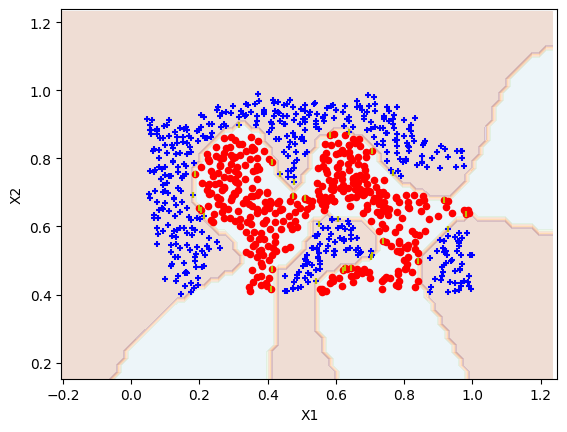

Number of support vectors:  30
[0]
Test accuracy = 100.0%


In [77]:
data = loadmat("D:\\most_wonted\\ai_projects\\svm\\data_set\\data2.mat")
# print(data1)

x = data['X']
y = data['y']
# print(x.shape,y.shape)


#small C  => UF
# model = svm.SVC(C= 1, kernel='rbf').fit(x, y.ravel())
# plot_svm(model, x, y)

#big C  => OF
model = svm.SVC(C= 100000, kernel='rbf').fit(x, y.ravel())
plot_svm(model, x, y)


testPoint = np.array([0.6,0.7]).reshape(1, 2)
print(model.predict(testPoint))

print('Test accuracy = {0}%'.format(np.round(model.score(x, y) * 100, 2)))


#print(testPoint.shape)


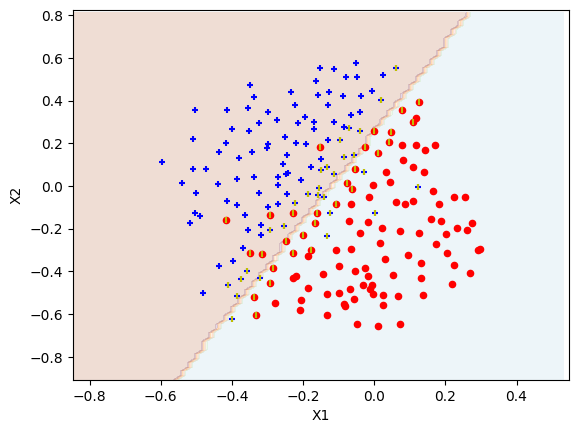

Number of support vectors:  56
Test accuracy = 92.42%


In [79]:
data = loadmat("D:\\most_wonted\\ai_projects\\svm\\data_set\\data3.mat")
# print(data1)

x = data['X']
y = data['y']
# print(x.shape,y.shape)


#small C  => UF
model = svm.SVC(C= 1.0, kernel='poly').fit(x, y.ravel())
plot_svm(model, x, y)

# #big C  => OF
# model = svm.SVC(C= 30, kernel='linear').fit(x, y.ravel())
# plot_svm(model, x, y)


print('Test accuracy = {0}%'.format(np.round(model.score(x, y) * 100, 2)))


In [73]:
TrainingdDta = loadmat("D:\\most_wonted\\ai_projects\\svm\\data_set\\spamTrain.mat")
Testingdata = loadmat("D:\\most_wonted\\ai_projects\\svm\\data_set\\spamTest.mat")

# print(Testingdata)

x = TrainingdDta['X']
y = TrainingdDta['y']
xTest = Testingdata['Xtest']
yTest = Testingdata['ytest']
print(x.shape,y.shape,xTest.shape,yTest.shape)


# #small C  => UF
model = svm.SVC().fit(x, y.ravel())
print('Test accuracy = {0}%'.format(np.round(model.score(xTest, yTest) * 100, 2)))


(4000, 1899) (4000, 1) (1000, 1899) (1000, 1)
Test accuracy = 98.7%
